In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

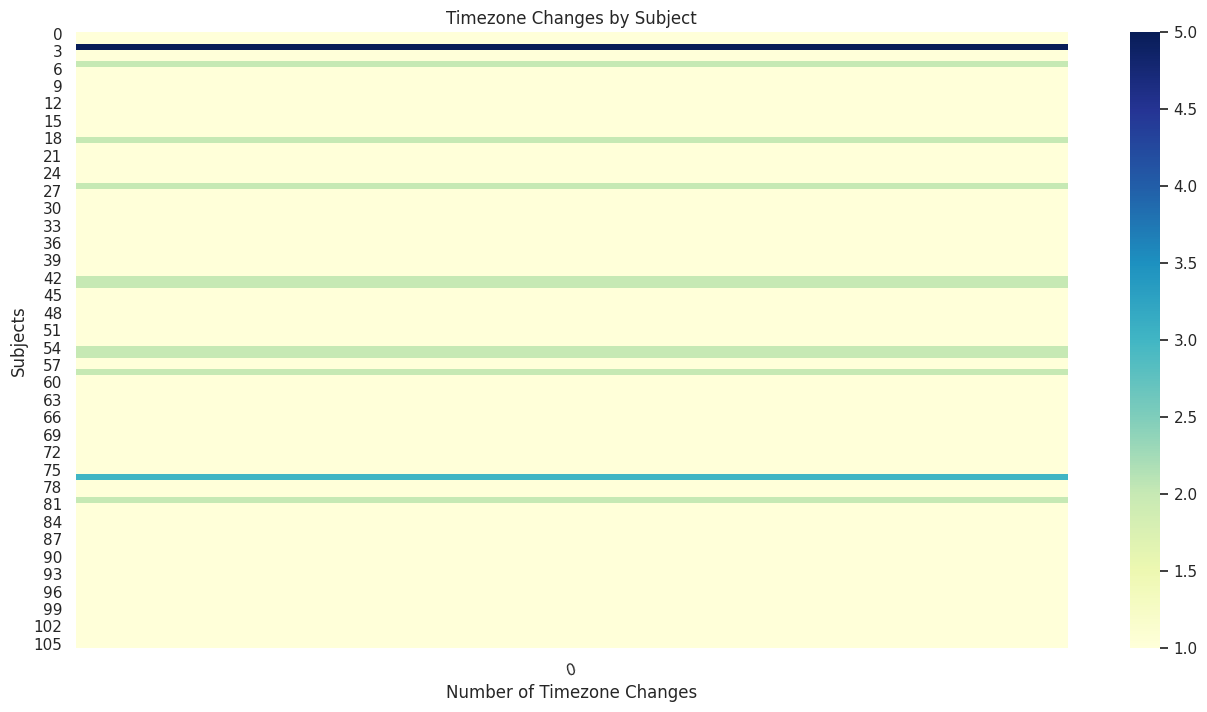

In [5]:

# Load the data
timezone_df = pd.read_csv('subject_timezone_log.csv')
registry_df = pd.read_csv('subject_registry.csv')

# Rename 'SubjectID' to 'subject' for consistency
registry_df.rename(columns={'SubjectID': 'subject'}, inplace=True)

# Filter the subjects based on the given conditions
eligible_subjects = registry_df[
(registry_df['ISA'] == 'BP03') & 
(~registry_df['Actual_Visit'].isin(['ED', 'SF']))
]

# Merge the two dataframes
merged_df = pd.merge(eligible_subjects, timezone_df, on=['Site', 'subject'])

# Count the distinct timezones for each subject
timezone_changes = merged_df.groupby('subject')['timezone_location'].nunique()

# Convert the series to a dataframe and reshape for the heatmap
df = timezone_changes.reset_index()
df.columns = ['subject', 'num_changes']
heatmap_data = df.set_index('subject')['num_changes'].values.reshape(-1, 1)


fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Timezone Changes by Subject")
plt.xlabel("Number of Timezone Changes")
plt.ylabel("Subjects")
plt.xticks(rotation=15)
plt.show()

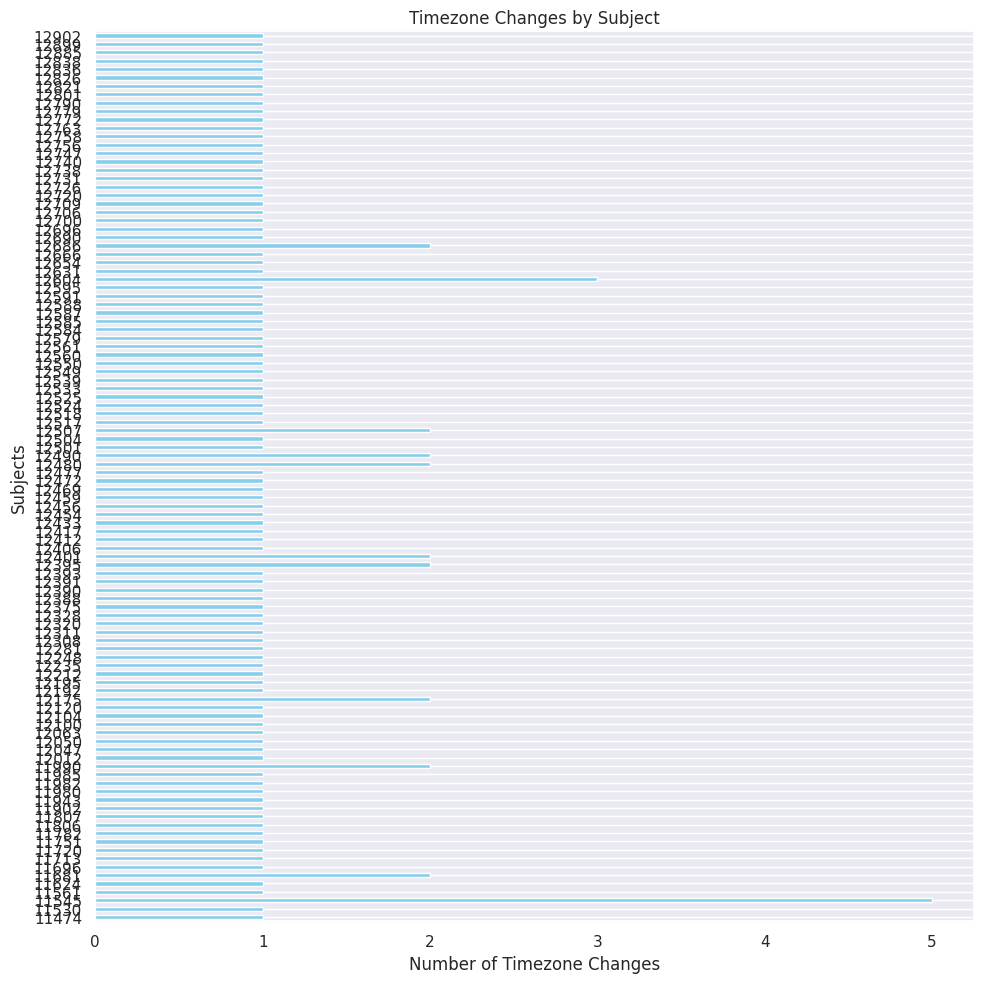

: 

In [6]:

# Load the data
timezone_df = pd.read_csv('subject_timezone_log.csv')
registry_df = pd.read_csv('subject_registry.csv')

# Rename 'SubjectID' to 'subject' for consistency
registry_df.rename(columns={'SubjectID': 'subject'}, inplace=True)

# Filter the subjects based on the given conditions
eligible_subjects = registry_df[
    (registry_df['ISA'] == 'BP03') & 
    (~registry_df['Actual_Visit'].isin(['ED', 'SF']))
]

# Merge the two dataframes
merged_df = pd.merge(eligible_subjects, timezone_df, on=['Site', 'subject'])

# Count the distinct timezones for each subject
timezone_changes = merged_df.groupby('subject')['timezone_location'].nunique()

# Plot using pandas
timezone_changes.plot(kind='barh', figsize=(10, 10), color='skyblue')
plt.title("Timezone Changes by Subject")
plt.xlabel("Number of Timezone Changes")
plt.ylabel("Subjects")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
